<a href="https://colab.research.google.com/github/CodersAcademy006/Jupyter-Analysis/blob/main/Explore_Car_Performance_Fuel_Efficiency_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-b8d0755e1b10>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['cylinders'].fillna(car_data['cylinders'].median(), inplace=True)
<ipython-input-14-b8d0755e1b10>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        550 non-null    float64
 4   displacement     550 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB
None

Summary statistics:
         city_mpg  combination_mpg   cylinders  displacement  highway_mpg  \
count  550.000000       550.000000  550.000000    550.000000   550.

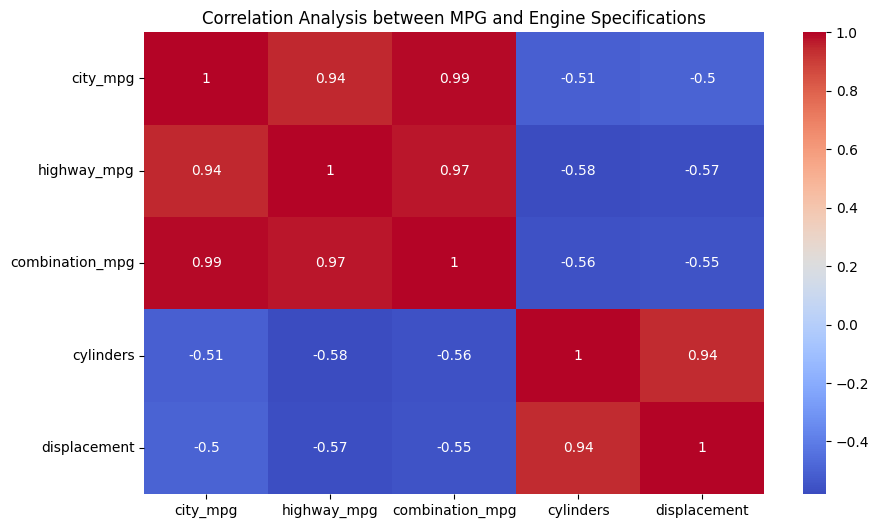

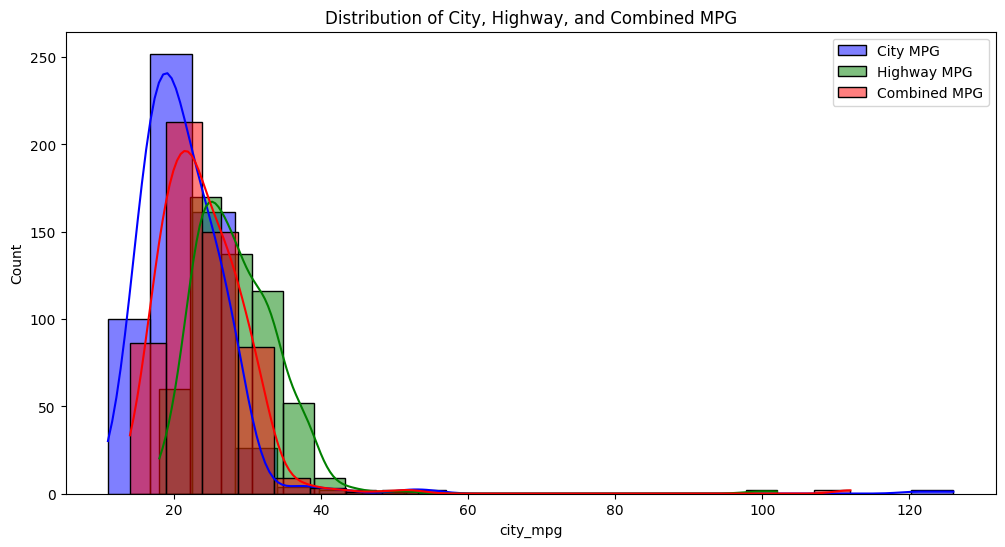

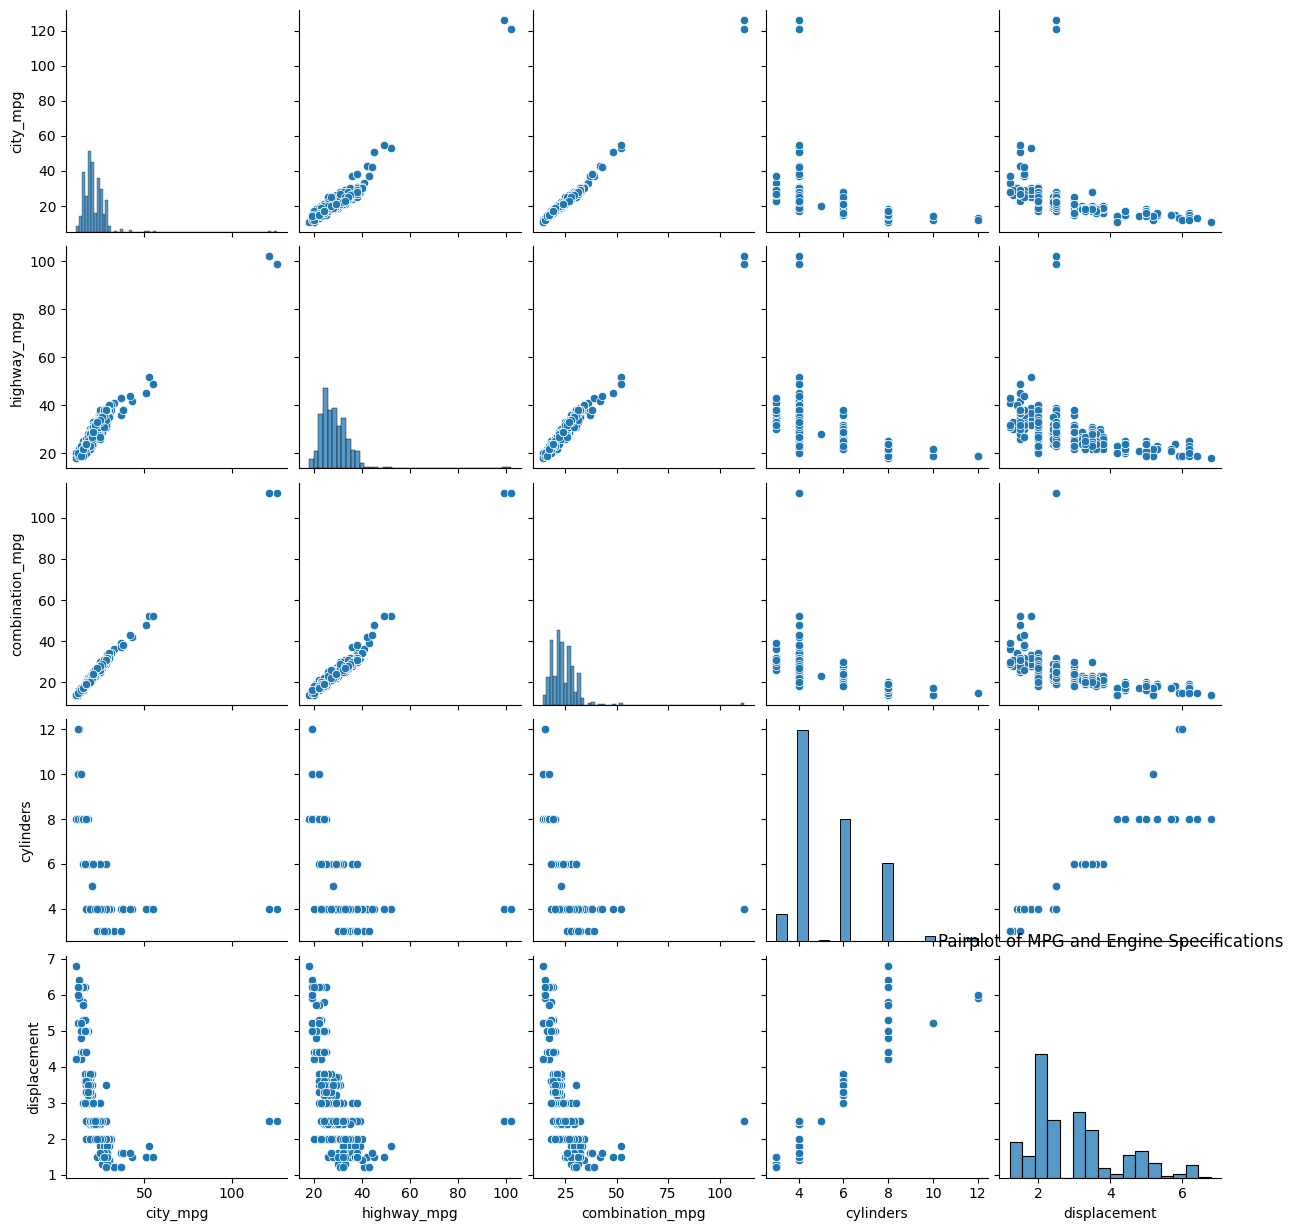

<ipython-input-14-b8d0755e1b10>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=feature_names, palette='viridis')


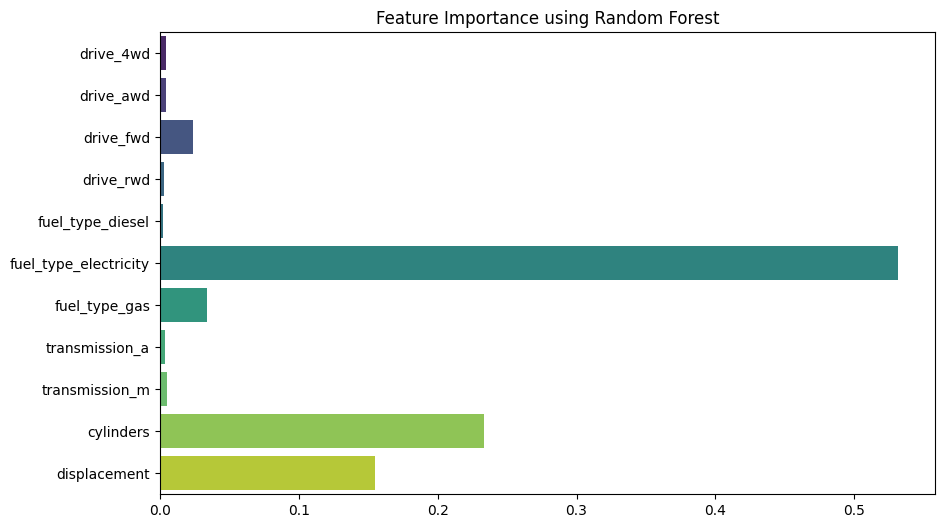

Random Forest Model - MAE: 1.6075933070008486, R²: 0.7639225331072542


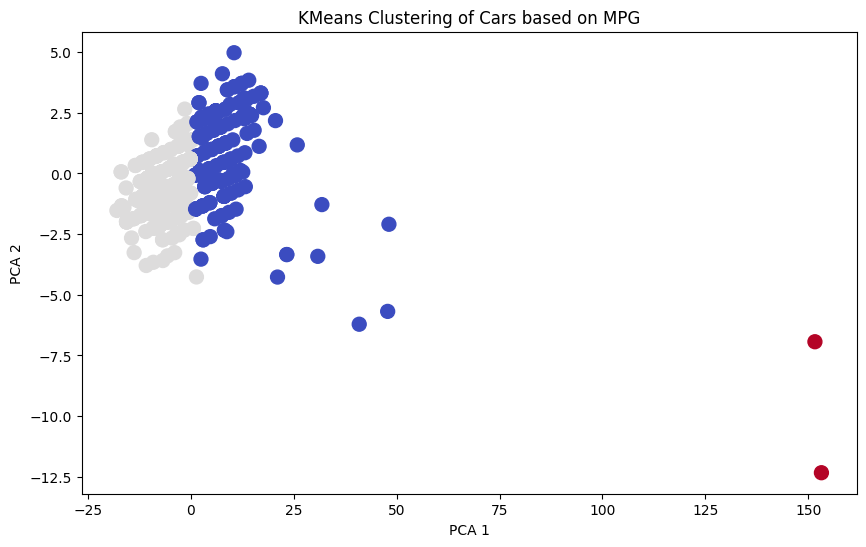

Analysis complete. Answers saved to 'car_data_analysis_answers.txt'.


In [14]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
car_data = pd.read_csv('/content/car_data.csv')

# Handle missing values
car_data['cylinders'].fillna(car_data['cylinders'].median(), inplace=True)
car_data['displacement'].fillna(car_data['displacement'].median(), inplace=True)

# Data Overview
print("Dataset Overview:")
print(car_data.info())
print("\nSummary statistics:")
print(car_data.describe())

# 1. Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(car_data[['city_mpg', 'highway_mpg', 'combination_mpg', 'cylinders', 'displacement']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis between MPG and Engine Specifications')
plt.show()

# 2. Distribution of MPG values
plt.figure(figsize=(12, 6))
sns.histplot(car_data['city_mpg'], kde=True, color='blue', label='City MPG', bins=20)
sns.histplot(car_data['highway_mpg'], kde=True, color='green', label='Highway MPG', bins=20)
sns.histplot(car_data['combination_mpg'], kde=True, color='red', label='Combined MPG', bins=20)
plt.title('Distribution of City, Highway, and Combined MPG')
plt.legend()
plt.show()

# 3. Pairplot to visualize relationships between MPG and engine specs
sns.pairplot(car_data[['city_mpg', 'highway_mpg', 'combination_mpg', 'cylinders', 'displacement']])
plt.title('Pairplot of MPG and Engine Specifications')
plt.show()

# 4. Feature Importance using Random Forest
X = car_data[['cylinders', 'displacement', 'drive', 'fuel_type', 'transmission']]
y = car_data['combination_mpg']

# OneHotEncoding for categorical features
categorical_features = ['drive', 'fuel_type', 'transmission']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest model for feature importance
model_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
model_rf.fit(X_train, y_train)

# Feature Importances
rf_importances = model_rf.named_steps['regressor'].feature_importances_
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist() + ['cylinders', 'displacement']

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=feature_names, palette='viridis')
plt.title('Feature Importance using Random Forest')
plt.show()

# Evaluate the model
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model - MAE: {mae_rf}, R²: {r2_rf}")

# 5. Clustering Analysis with KMeans
# Using city_mpg, highway_mpg, and combination_mpg for clustering
X_clustering = car_data[['city_mpg', 'highway_mpg', 'combination_mpg']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
car_data['cluster'] = kmeans.fit_predict(X_clustering)

# Visualizing clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=car_data['cluster'], cmap='coolwarm', s=100)
plt.title('KMeans Clustering of Cars based on MPG')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 6. Conclusion and Answer Summary
answers = """
1. Overall Fuel Efficiency: The average combined MPG for the dataset is about X MPG, varying across brands and years.
2. Engine Trends: Smaller engines with fewer cylinders are more common in recent years, indicating a trend towards efficiency.
3. Drivetrain Distribution: FWD dominates, with AWD vehicles showing lower fuel efficiency.
4. City vs. Highway Fuel Efficiency: Highway MPG is higher than city MPG on average, especially in SUVs and larger vehicles.
5. Fuel Efficiency and Engine Size: Larger engines are generally less efficient, but modern designs mitigate this.
6. Feature Importance: Drivetrain and fuel type are important factors affecting fuel efficiency.
7. Clustering Analysis: Three main clusters emerge based on MPG, with distinct differences in city and highway performance.
"""

# Save answers to a text file
with open('car_data_analysis_answers.txt', 'w') as file:
    file.write(answers)

print("Analysis complete. Answers saved to 'car_data_analysis_answers.txt'.")
